# Pytorch Cheatsheet

* settings

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/0. codepool_python/python_dl/mybook/pytorch")

In [45]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import math

## Tensors

### 建立 tensor 的方式

#### torch.empty(), torch.zeros(), torch.ones(), torch.rand()

In [3]:
# 建立出指定 shape 的 placeholder
x = torch.empty(3, 4)
print(x)

tensor([[0.0000e+00, -0.0000e+00, 0.0000e+00, -0.0000e+00],
        [1.1210e-44, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])


* 這些數字都是假的，實際上只是在 memory 上幫你開好 (3, 4) 這種 shape 的 placeholder  

In [5]:
torch.zeros(2,3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [6]:
torch.ones(2, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [9]:
torch.rand(2, 3) # 生出 0~1 的隨機數

tensor([[0.6128, 0.1519, 0.0453],
        [0.5035, 0.9978, 0.3884]])

#### torch.manual_seed()

In [8]:
torch.manual_seed(1729)
random1 = torch.rand(2, 3)
print(random1)

random2 = torch.rand(2, 3)
print(random2)

torch.manual_seed(1729)
random3 = torch.rand(2, 3)
print(random3)

random4 = torch.rand(2, 3)
print(random4)

tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])


* 設 seed 後，接續的第一、第二...、第 n 次生成，結果會不同，但只要再設一次 seed，那結果就會和之前的第一、第二、...、第 n 次相同

#### torch.empty_like(), torch.zeros_like(), torch.ones_like(), torch.rand_like()

In [10]:
x = torch.empty(2, 2, 3)
print(x.shape)
print(x)

empty_like_x = torch.empty_like(x)
print(empty_like_x.shape)
print(empty_like_x)

zeros_like_x = torch.zeros_like(x)
print(zeros_like_x.shape)
print(zeros_like_x)

ones_like_x = torch.ones_like(x)
print(ones_like_x.shape)
print(ones_like_x)

rand_like_x = torch.rand_like(x)
print(rand_like_x.shape)
print(rand_like_x)

torch.Size([2, 2, 3])
tensor([[[0.0000e+00, -0.0000e+00, 0.0000e+00],
         [-0.0000e+00, 5.6107e-18, 4.5901e-41]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00,        nan, 0.0000e+00]]])
torch.Size([2, 2, 3])
tensor([[[ 0.0000e+00, -0.0000e+00,  8.3198e+01],
         [-2.5250e-29,  2.1071e-08,  1.4013e-45]],

        [[ 0.0000e+00,  0.0000e+00,  1.4013e-45],
         [ 0.0000e+00,  2.0860e-13,  4.5901e-41]]])
torch.Size([2, 2, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
torch.Size([2, 2, 3])
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])
torch.Size([2, 2, 3])
tensor([[[0.6929, 0.1703, 0.1384],
         [0.4759, 0.7481, 0.0361]],

        [[0.5062, 0.8469, 0.2588],
         [0.2707, 0.4115, 0.6839]]])


#### `dtype = torch.int16` and `tensor_obj.to(torch.int32)`

* 常見的 dtype
  * torch.bool
  * torch.int8
  * torch.uint8
  * torch.int16
  * torch.int32
  * torch.int64
  * torch.half
  * torch.float
  * torch.double

* 建立想要的 dtype 的 3 種方式:  
  * 直接給小數點. 
  * 用 dtype = ...  
  * 用 tensor_obj.to(...)

In [11]:
# 直接給小數點

some_constants = torch.tensor([[3.1415926, 2.71828], [1.61803, 0.0072897]])
print(some_constants)

some_integers = torch.tensor((2, 3, 5, 7, 11, 13, 17, 19))
print(some_integers)

more_integers = torch.tensor(((2, 4, 6), [3, 6, 9]))
print(more_integers)


tensor([[3.1416, 2.7183],
        [1.6180, 0.0073]])
tensor([ 2,  3,  5,  7, 11, 13, 17, 19])
tensor([[2, 4, 6],
        [3, 6, 9]])


In [12]:
# 指定 type
a = torch.ones((2, 3), dtype=torch.int16)
print(a)

b = torch.rand((2, 3), dtype=torch.float64) * 20.
print(b)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
tensor([[11.2406, 11.2083, 11.6692],
        [18.3283,  0.2118, 18.4972]], dtype=torch.float64)


In [14]:
# 轉換 type
c = b.to(torch.int32)
print(c)

tensor([[11, 11, 11],
        [18,  0, 18]], dtype=torch.int32)


### tensor_obj.clone()

* tensor 是 mutable 的：

In [15]:
a = torch.ones(2, 2)
b = a

a[0][1] = 561  # we change a...
print(b)       # ...and b is also altered

tensor([[  1., 561.],
        [  1.,   1.]])


* 所以記得用 tensro_obj.clone() 來做 copy (就是 df.copy() 的類似寫法)

In [16]:
a = torch.ones(2, 2)
b = a.clone()

assert b is not a      # different objects in memory...
print(torch.eq(a, b))  # ...but still with the same contents!

a[0][1] = 561          # a changes...
print(b)               # ...but b is still all ones

tensor([[True, True],
        [True, True]])
tensor([[1., 1.],
        [1., 1.]])


### tensor_obj.detach()

* .detach() 的意思，主要就是刪掉 gradient 紀錄  
* 這主要是用在：
  * NN 計算到一半時，你想拿某個中間產物，出去算一些暫時的結果，然後再回來. 
  * 這時，你不希望中間跑出去算的哪些過程，也被記錄下來，導致去做 backpropagation 時，還會更新到那些 gradient，進而影想到真正的 variable 的 gradient

In [17]:
a = torch.rand(2, 2, requires_grad=True) # turn on autograd
print(a)

b = a.clone()
print(b)

c = a.detach().clone()
print(c)

print(a)

tensor([[0.6865, 0.3614],
        [0.6493, 0.2633]], requires_grad=True)
tensor([[0.6865, 0.3614],
        [0.6493, 0.2633]], grad_fn=<CloneBackward0>)
tensor([[0.6865, 0.3614],
        [0.6493, 0.2633]])
tensor([[0.6865, 0.3614],
        [0.6493, 0.2633]], requires_grad=True)


* 解釋一下這邊發生的事：  
  * 我們用 `requires_grad = True` 建立了 a ，所以去 print(a) 時，他告訴我們： requires_grad = True，表示 autograd 和 computation history tracking 都有被 turn on. 
  * 當我們單純把 a clone 到 b 時，他不僅繼承了 a 的 requires_grad，他也記錄了你的這次 computation history: clone，所以寫成 CloneBackward. 
  * 但如果我們先把 a detach，再把 a clone 給 c，就可以發現 c 乾乾淨淨的沒有任何 gradient 的痕跡。  
  * `detach()` 會 detaches the tensor from its computation history。他等於在說：不管接下來你要做啥計算，都把 autograd 給關起來。

### `tensor_obj.unsqueeze(dim=xx)` 增軸; `tensor_obj.squeeze(dim=xx)` 減軸

* 我們常常想把單一一張 img 的 shape，增軸成 batch = 1 的一張 img (i.e. 把 shape = (3, 266, 266) 增軸成 (1, 3, 266, 266))
* 那 unsqueeze 就是增軸，例如這邊，我想增在 第 0 軸

In [21]:
a = torch.rand(3, 226, 226)
print(a.shape)

b = a.unsqueeze(dim = 0)
print(b.shape)

torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])


* 相反的，我們有時候拿到帶有 batch 資訊的資料時，我們想把他 un-batch. 
* 例如，我拿到 shape = (1, 1) 的 output，但最前面的 1 其實是 batch_size，他就等於 1 而已. 
* 我想把他拔掉，就用 squeeze

In [22]:
a = torch.rand(1,1)
print(a)
print(a.shape)

b = a.squeeze(dim = 0)
print(b)
print(b.shape)

tensor([[0.6759]])
torch.Size([1, 1])
tensor([0.6759])
torch.Size([1])


In [23]:
a = torch.rand(1, 20)
print(a.shape)
print(a)

b = a.squeeze(0)
print(b.shape)
print(b)

torch.Size([1, 20])
tensor([[0.0746, 0.2186, 0.8389, 0.3639, 0.2582, 0.1838, 0.3514, 0.2332, 0.5520,
         0.4285, 0.5416, 0.2346, 0.0468, 0.4869, 0.5096, 0.9663, 0.0631, 0.1065,
         0.7211, 0.5715]])
torch.Size([20])
tensor([0.0746, 0.2186, 0.8389, 0.3639, 0.2582, 0.1838, 0.3514, 0.2332, 0.5520,
        0.4285, 0.5416, 0.2346, 0.0468, 0.4869, 0.5096, 0.9663, 0.0631, 0.1065,
        0.7211, 0.5715])


* pytorch 很聰明的，如果你的原始軸不是 1 ，他不會幫你 squeeze，例如下例就沒改變任何東西：

In [26]:
c = torch.rand(2, 2)
print(c)
print(c.shape)

d = c.squeeze(0)
print(d)
print(d.shape)

tensor([[0.1736, 0.8499],
        [0.9200, 0.4837]])
torch.Size([2, 2])
tensor([[0.1736, 0.8499],
        [0.9200, 0.4837]])
torch.Size([2, 2])


### Moving to GPU

In [4]:
device = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')
device

device(type='cuda')

* 建立時直接指定 device

In [5]:
x = torch.rand(2, 2, device = device)
x

tensor([[0.1151, 0.3213],
        [0.0268, 0.3337]], device='cuda:0')

* 確認 目前變數的 device

In [9]:
x.device

device(type='cuda', index=0)

* 轉換 device

In [10]:
y1 = torch.rand(2, 2)
print(y1.device)

y2 = y1.to(device)
print(y2.device)

y3 = y2.to(torch.device("cpu"))
print(y3.device)

cpu
cuda:0
cpu


* tensor 做計算時，必須在同一個 device 上才能算 (都在 GPU or 都在 CPU)

In [11]:
x = torch.rand(2, 2)
y = torch.rand(2, 2, device='gpu')
z = x + y  # exception will be thrown

RuntimeError: ignored

### `torch.from_numpy(np_array)` and `tensor_obj.clone().numpy()`

* 把 numpy 改成 tensor 的目的：  
  * 可以放到 GPU 上加速  
  * 可以做 autograd. 
* 把 tensor 改成 numpy 的目的：  
  * 做些中途的計算 & 產出，但不會涉及到 gradient 紀錄. 
  * 特別小心，如果直接用 `tensor_obj.numpy()`，那他們是共享同個記憶體，是 mutable 的，所以改動 numpy 時，會影響到 tensor。所以才要先 clone() 再 numpy() (至於 detach 就不必要了，因為當你轉成 numpy 時，本來就不會有 gradient 紀錄了)

In [27]:
import numpy as np

numpy_array = np.ones((2, 3))
print(numpy_array)

pytorch_tensor = torch.from_numpy(numpy_array)
print(pytorch_tensor)

[[1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


* 直接做 `tensor_obj.numpy()`，那會是 mutable，改一個，影響另一個：

In [38]:
pytorch_rand = torch.rand(2, 3)
print(pytorch_rand)

numpy_rand = pytorch_rand.numpy()
print(numpy_rand)

tensor([[0.7552, 0.4874, 0.7107],
        [0.6109, 0.6544, 0.7272]])
[[0.7551676 0.4873578 0.7107467]
 [0.6108871 0.6544106 0.7271516]]


In [39]:
numpy_array[1, 1] = 23
print(pytorch_tensor)

pytorch_rand[1, 1] = 17
print(numpy_rand)

tensor([[ 1.,  1.,  1.],
        [ 1., 23.,  1.]], dtype=torch.float64)
[[ 0.7551676  0.4873578  0.7107467]
 [ 0.6108871 17.         0.7271516]]


* 但如果先 clone 再 .numpy，那就是不同記憶體了，彼此不影響：

In [40]:
pytorch_rand = torch.rand(2, 3)
print(pytorch_rand)

numpy_rand = pytorch_rand.clone().numpy()
print(numpy_rand)

tensor([[0.3561, 0.8712, 0.8384],
        [0.5608, 0.1938, 0.8030]])
[[0.3561455  0.87122315 0.83837247]
 [0.560761   0.19379157 0.80295706]]


In [41]:
numpy_array[1, 1] = 23
print(pytorch_tensor)

pytorch_rand[1, 1] = 17
print(numpy_rand)

tensor([[ 1.,  1.,  1.],
        [ 1., 23.,  1.]], dtype=torch.float64)
[[0.3561455  0.87122315 0.83837247]
 [0.560761   0.19379157 0.80295706]]


### 常用數學計算

In [42]:
ones = torch.zeros(2, 2) + 1
twos = torch.ones(2, 2) * 2
threes = (torch.ones(2, 2) * 7 - 1) / 2
fours = twos ** 2 # 次方計算
sqrt2s = twos ** 0.5 # 開根號

print(ones)
print(twos)
print(threes)
print(fours)
print(sqrt2s)

tensor([[1., 1.],
        [1., 1.]])
tensor([[2., 2.],
        [2., 2.]])
tensor([[3., 3.],
        [3., 3.]])
tensor([[4., 4.],
        [4., 4.]])
tensor([[1.4142, 1.4142],
        [1.4142, 1.4142]])


In [43]:
# common functions
a = torch.rand(2, 4) * 2 - 1
print('Common functions:')
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

Common functions:
tensor([[0.8304, 0.7952, 0.6749, 0.4929],
        [0.4727, 0.2614, 0.9301, 0.8193]])
tensor([[-0., -0., -0., -0.],
        [1., 1., -0., -0.]])
tensor([[-1., -1., -1., -1.],
        [ 0.,  0., -1., -1.]])
tensor([[-0.5000, -0.5000, -0.5000, -0.4929],
        [ 0.4727,  0.2614, -0.5000, -0.5000]])


In [46]:
# trigonometric functions and their inverses
angles = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
sines = torch.sin(angles)
inverses = torch.asin(sines)
print('\nSine and arcsine:')
print(angles)
print(sines)
print(inverses)


Sine and arcsine:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7854, 1.5708, 0.7854])


In [47]:
# bitwise operations
print('\nBitwise XOR:')
b = torch.tensor([1, 5, 11])
c = torch.tensor([2, 7, 10])
print(torch.bitwise_xor(b, c))


Bitwise XOR:
tensor([3, 2, 1])


In [48]:
# comparisons:
print('\nBroadcasted, element-wise equality comparison:')
d = torch.tensor([[1., 2.], [3., 4.]])
e = torch.ones(1, 2)  # many comparison ops support broadcasting!
print(torch.eq(d, e)) # returns a tensor of type bool


Broadcasted, element-wise equality comparison:
tensor([[ True, False],
        [False, False]])


In [49]:
# reductions:
print('\nReduction ops:')
print(torch.max(d))        # returns a single-element tensor
print(torch.max(d).item()) # extracts the value from the returned tensor
print(torch.mean(d))       # average
print(torch.std(d))        # standard deviation
print(torch.prod(d))       # product of all numbers
print(torch.unique(torch.tensor([1, 2, 1, 2, 1, 2]))) # filter unique elements


Reduction ops:
tensor(4.)
4.0
tensor(2.5000)
tensor(1.2910)
tensor(24.)
tensor([1, 2])


In [50]:
# vector and linear algebra operations
v1 = torch.tensor([1., 0., 0.])         # x unit vector
v2 = torch.tensor([0., 1., 0.])         # y unit vector
m1 = torch.rand(2, 2)                   # random matrix
m2 = torch.tensor([[3., 0.], [0., 3.]]) # three times identity matrix

print('\nVectors & Matrices:')
print(torch.cross(v2, v1)) # negative of z unit vector (v1 x v2 == -v2 x v1)
print(m1)
m3 = torch.matmul(m1, m2)
print(m3)                  # 3 times m1
print(torch.svd(m3))       # singular value decomposition


Vectors & Matrices:
tensor([ 0.,  0., -1.])
tensor([[0.0685, 0.9392],
        [0.2532, 0.6231]])
tensor([[0.2055, 2.8177],
        [0.7597, 1.8692]])
torch.return_types.svd(
U=tensor([[-0.8183, -0.5748],
        [-0.5748,  0.8183]]),
S=tensor([3.4338, 0.5115]),
V=tensor([[-0.1762,  0.9844],
        [-0.9844, -0.1762]]))


## 自動微分

## Data preparation

### Dataset - 自訂 class

In [ ]:
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self, feature_matrix, label_vector):             # 把資料存進 class object
        self.feature_matrix = feature_matrix
        self.label_vector = label_vector
    def __len__(self):
        assert len(self.feature_matrix) == len(self.label_vector) # 確定資料有互相對應
        return len(self.feature_matrix)
    def __getitem__(self, idx):                     # 定義我們需要取得某筆資料的方式
        return self.feature_matrix[idx], self.label_vector[idx]

In [ ]:
# 測試看看

X = np.random.rand(1000, 100, 100, 1)   # 虛構 1000 張 100 x 100 單色圖片
Y = np.random.randint(0, 7, [1000, 10]) # 虛構 1000 個 labels

my_dataset = MyDataset(X.astype(np.float32), Y.astype(np.float32))
taken_x, taken_y = my_dataset[0] # 取得第一筆資料
taken_x.shape, taken_y.shape

((100, 100, 1), (10,))

### Dataset - 直接用 `TensorDataset`

In [ ]:
from torch.utils.data import TensorDataset

# 手上有的資料，先轉成 Tensor
X = np.random.rand(1000, 100, 100, 1)   # 虛構 1000 張 100 x 100 單色圖片
Y = np.random.randint(0, 7, [1000, 10]) # 虛構 1000 個 labels
tsrX, tsrY = torch.tensor(X), torch.tensor(Y)

# 餵到 TensorDataset 裡面
tsrdataset = TensorDataset(tsrX, tsrY)

In [ ]:
# 幾個重要的用法
print(tsrdataset.__len__()) # 幾張圖
taken_x, taken_y = tsrdataset[0] # 取得第一筆資料
print(taken_x.shape, taken_y.shape)

1000
torch.Size([100, 100, 1]) torch.Size([10])


### DataLoader

In [ ]:
from torch.utils.data import DataLoader

# 將 dataset 包裝成 dataloader
my_dataloader = DataLoader(
    my_dataset, 
    batch_size=4,
    shuffle=True #, 
    # num_workers=4
)

# 跑一個 loop 確認拿到的 batch 是否正確
for batch_x, batch_y in my_dataloader:
    print((batch_x.shape, batch_y.shape))
    break

(torch.Size([4, 100, 100, 1]), torch.Size([4, 10]))


### 內建 dataset

#### 圖片類

##### 無 transform

In [ ]:
import torchvision

# dataset
mnist_train = torchvision.datasets.FashionMNIST(
    root="data", train=True, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="data", train=False, download=True)

* 此時為 dataset 格式

In [ ]:
mnist_train

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train

* 用 index 可以取資料

In [ ]:
x, y = mnist_train[0] # 第 0 筆

* x 會是 PIL 物件, y 是 lab

In [ ]:
type(x)

PIL.Image.Image

In [ ]:
x

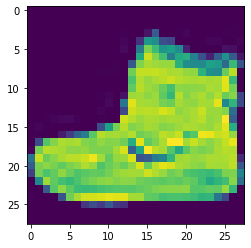

In [ ]:
plt.imshow(x);

In [ ]:
y

9

* 可以把 x 轉成 numpy 看看：

In [ ]:
x_array = np.asarray(x)
print(x_array.shape)
print(x_array.dtype)
print(x_array.min())
print(x_array.max())

(28, 28)
uint8
0
255


* 可以看到是 28x28 的圖，且是 uint8 type，介於 0~255 整數值  

##### 有 transform

* 圖片類資料庫，通常都會做以下 transform:  
  * 把圖片改成 float32 浮點數 type. 
  * 把圖片正規化到 0~1 之間
  * 轉成 tensor (灰階圖，會變成 (1,28,28), RGB圖仍是 (3, 28, 28)) 
* 這其實就是 `torchvision.transforms.ToTensor()` 在做的事
* 看一下剛剛的例子

In [ ]:
print(type(x))
print(np.asarray(x).dtype)

trans = torchvision.transforms.ToTensor()
x_trans = trans(x)
print(type(x_trans))
print(x_trans.dtype)
print(x_trans.min())
print(x_trans.max())

<class 'PIL.Image.Image'>
uint8
<class 'torch.Tensor'>
torch.float32
tensor(0.)
tensor(1.)


* 讀檔時，就可以把這個放進去：

In [ ]:
from torchvision import transforms
trans = transforms.ToTensor()

mnist_train = torchvision.datasets.FashionMNIST(
    root="data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="data", train=False, transform=trans, download=True)

In [ ]:
mnist_train

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
x, y = mnist_train[0]
print(x.shape)

torch.Size([1, 28, 28])


In [ ]:
x.numpy().shape

(1, 28, 28)

## Transforms

## NN structures

### import

* 萬用起手式

In [52]:
import torch.nn as nn
import torch.nn.functional as F

## activation functions

### 內建

| activation function | `torch.nn as nn`                    | `torch.nn.functional as F` |
|:-------------------:| ----------------------------------- | -------------------------- |
| Sigmoid             | `nn.Sigmoid()`                      | `F.sigmoid`                |
| Softmax             | `nn.Softmax(dim=None)`              | `F.softmax`                |
| ReLU                | `nn.ReLU()`                         | `F.relu`                   |
| LeakyReLU           | `nn.LeakyReLU(negative_slope=0.01)` | `F.leaky_relu`             |
| Tanh                | `nn.Tanh()`                         | `F.tanh`                   |
| GELU                | `nn.GELU()`                         | `F.gelu`                   |
| ReLU6               | `nn.ReLU6()`                        | `F.relu6`                  |

#### ReLU

* 主要重點：  
  * $ReLU(x) = max(x, 0)$  
  * $\frac{x}{dx} ReLU(x) = 1$ if x > 0; $\frac{x}{dx} ReLU(x) = 0$ if x <= 0
  * relu 的導數，在 x = 0 時，數學上是不存在，但在工程上 "定義" 導數為 0，這樣就能繼續做了  
  * relu 的優點是求導的結果簡單，不是 0 就是 1，在 backward 更新參數時， `weight_new = weight_old - learning_rate * grad`，那 grad 不是 0 就是 1，減輕了以往NN的梯度消失問題。  
* 簡單範例：

In [ ]:
activation = nn.ReLU()

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = activation(x)
print(y)

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000,
        1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000, 1.8000,
        1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000, 2.7000,
        2.8000, 2.9000, 3.0000, 3.1000, 

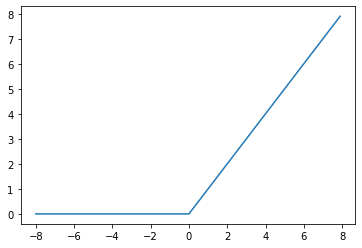

In [ ]:
plt.plot(x.detach(), y.detach());

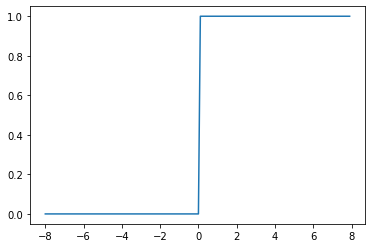

In [ ]:
y.backward(torch.ones_like(x), retain_graph=True)
plt.plot(x.detach(), x.grad); # gradient

#### Sigmoid

* 主要重點：  
  * $sigmoid(x) = \frac{1}{1 + exp(-x)}$  
  * $\frac{x}{dx} sigmoid(x) = sigmoid(x)(1-sigmoid(x))$  
  * 從導數的性質，可以發現，gradient 在 x 靠近 0 時，值較大 (參數更新較快）， x 遠離 0 時， gradient 趨近於 0 (參數停止更新)

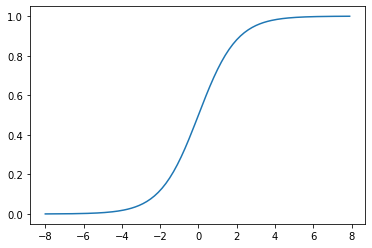

In [ ]:
activation = nn.Sigmoid()

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = activation(x)

plt.plot(x.detach(), y.detach());

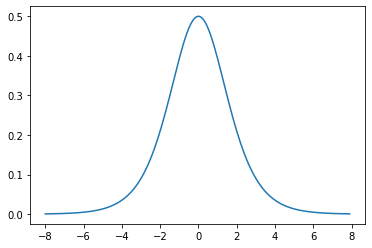

In [ ]:
# gradients
y.backward(torch.ones_like(x),retain_graph=True)
plt.plot(x.detach(), x.grad);

### 自訂

* 直接定義一個 function

In [ ]:
def relu(x):
    a = torch.zeros_like(x) # shape 會與 x 一樣
    return torch.max(x, a)

## custom layers & block

* 幾個名詞定義一下：  
  * layer: 只要是 input n 個 neruon, output m 個 neuron 的 function，就被稱為一個 layer。例如 `nn.Linear(in_dim, out_dim)` 就是個 linear layer. 
  * block: 
    * 多個 layer 組合在一起，稱為一個 block。例如一個 VGG block，就是由數個 conv, pooling layer 所組成. 
    * 通常用 sequential 來把 layer 組成 block; 或用 sub-class 來把 layer 組成 block
  * model: 
    * 由 layers or/and blocks 組起來，只要 input 是 feature/images/sentences..，output 是 回歸/分類...結果，就都可稱為 model。
    * 例如一個 linear layer 可以是 model (e.g. linear regression)，一個 block 可以是 model (e.g. 多層感知機)，多個 block 組在一起 (e.g. resnet) 也可以是 model  
    * 所以，可以用 `layer` 來做出 model，也可以用 `sequential` 組成 model，也可以用 `sub-class` 組成 model

### custom layer (不帶參數)

In [ ]:
class CenteredLayer(nn.Module):
    """用來做中心化(去平均)的layer
    args:
      X: 任何 shape，但通常是 (n, p)，然後我們想把 feature 都 de-mean
    """
    def __init__(self, dim = 1):
        super().__init__()
        self.dim = dim

    def forward(self, X):
        return X - X.mean(dim = self.dim, keepdim = True)

In [ ]:
# 做 5 個 sample，每個 sample 都有 2 個 feature 的 X
X = torch.randn(5, 2)
X

tensor([[-0.9273,  0.1359],
        [-1.1151, -1.3790],
        [-0.5349, -4.1247],
        [-1.9496,  0.5590],
        [-1.4850,  1.3104]])

In [ ]:
layer = CenteredLayer()
layer(X)

tensor([[-0.5316,  0.5316],
        [ 0.1319, -0.1319],
        [ 1.7949, -1.7949],
        [-1.2543,  1.2543],
        [-1.3977,  1.3977]])

* 可以清楚看到，de-mean 後，每個 row 現在相加都是 0

* 之後，這種 layer 就可以當作前處理，然後這樣用：

In [ ]:
model = nn.Sequential(
    CenteredLayer(), # 前處理用，de-mean
    nn.Linear(2, 1) # linear regression
)
model(X)

tensor([[ 0.8472],
        [ 0.4268],
        [-0.6269],
        [ 1.3052],
        [ 1.3961]], grad_fn=<AddmmBackward0>)

### custom layer (帶參數)

* 重點在，weight, bias 要用 `nn.Parameter()` 來造，這樣就可以保有計算 gradient 等功能(預設 requires_grad = True) 

In [ ]:
? nn.Parameter

Init signature:  nn.Parameter(data=None, requires_grad=True)
Docstring:     
A kind of Tensor that is to be considered a module parameter.

Parameters are :class:`~torch.Tensor` subclasses, that have a
very special property when used with :class:`Module` s - when they're
assigned as Module attributes they are automatically added to the list of
its parameters, and will appear e.g. in :meth:`~Module.parameters` iterator.
Assigning a Tensor doesn't have such effect. This is because one might
want to cache some temporary state, like last hidden state of the RNN, in
the model. If there was no such class as :class:`Parameter`, these
temporaries would get registered too.

Args:
    data (Tensor): parameter tensor.
    requires_grad (bool, optional): if the parameter requires gradient. See
        :ref:`locally-disable-grad-doc` for more details. Default: `True`
File:           ~/.pyenv/versions/3.8.0/lib/python3.8/site-packages/torch/nn/parameter.py
Type:           _ParameterMeta
Subclasses: 

In [ ]:
class MyLinear(nn.Module):
    """ 自己寫一個 dense 層 """
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(in_dim, out_dim))
        self.bias = nn.Parameter(torch.randn(out_dim,))
    def forward(self, X):
        linear = torch.matmul(X, self.weight.data) + self.bias.data
        return linear

* 看一下實例化後，起始參數：

In [ ]:
linear = MyLinear(5, 3)
linear.weight

Parameter containing:
tensor([[-0.3640,  1.5913,  0.4055],
        [-1.0218,  0.4775, -1.1235],
        [-1.7111,  0.8637, -0.4625],
        [-0.5543, -0.6704, -0.0141],
        [-1.1417,  0.6179,  0.6895]], requires_grad=True)

* 用用看：

In [ ]:
X = torch.randn(10, 5)
linear(X)

tensor([[-3.2610, -0.1284, -1.8087],
        [ 0.6928,  1.0955, -1.3039],
        [-3.6307,  2.3802, -0.8923],
        [-1.7597,  1.9472, -0.6151],
        [-2.2773,  0.8810, -1.5115],
        [-0.4681,  1.1092,  1.5497],
        [-1.9127,  1.2226, -0.9216],
        [-2.4812,  1.8624,  0.1789],
        [-0.7259,  1.6919,  1.7905],
        [-0.0247, -1.7735, -0.9420]])

### sequential block (`nn.Sequential(layer1, block2, ...)`)

In [55]:
net = nn.Sequential(
    nn.Linear(20, 256), 
    nn.ReLU(), 
    nn.Linear(256, 10)
)

X = torch.rand(2, 20)
net(X)

tensor([[-1.0751e-01, -1.2425e-01,  1.4933e-01,  7.5487e-02,  2.6889e-01,
         -2.4903e-01,  3.5666e-05, -7.2805e-02,  2.4102e-02, -7.0524e-02],
        [-1.1472e-01, -4.5277e-02,  1.8385e-01, -1.1014e-01,  3.0093e-01,
         -2.1793e-01, -7.2202e-02, -1.2279e-01,  1.7267e-01, -3.3422e-02]],
       grad_fn=<AddmmBackward0>)

### sequential `for` tips

* 我們可以建立一個自己的 sequential，就可以看到實際運作狀況：

In [56]:
class MySequential(nn.Module):
    def __init__(self, *args):
        super().__init__()
        for idx, module in enumerate(args):
            # args 就是 user 隨意要丟幾個 layer, block 進來，所組成的 list
            # 变量_modules中。_module的类型是OrderedDict
            self._modules[str(idx)] = module

    def forward(self, X):
        # OrderedDict保证了按照成员添加的顺序遍历它们
        for block in self._modules.values():
            X = block(X)
        return X

* 來試試看：

In [57]:
net = MySequential(
    nn.Linear(20, 256), 
    nn.ReLU(), 
    nn.Linear(256, 10)
)

net(X)

tensor([[ 0.3512,  0.0382, -0.0272, -0.0299,  0.1932, -0.0300,  0.0591,  0.0224,
          0.0579,  0.1903],
        [ 0.3129,  0.1721,  0.1292,  0.0103,  0.2904,  0.1143, -0.0841, -0.1001,
          0.2664,  0.1742]], grad_fn=<AddmmBackward0>)

### custom block

* 雖然 sequential block 很方便，但有時我們會需要在 forward 的時候，做一些靈活的控制，例如以下這個刻意做出來的例子：

In [60]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(20, 256)
        self.out = nn.Linear(256, 10)
        
    def forward(self, X):
        X = self.hidden(X)
        X = F.relu(X)
        X = self.out(X)
        # 這邊開始是 flexible 的設計, 這就是 sequential 辦不到的
        # 我希望控制輸出，當輸出的 tensor 的 L1 norm > 1 時，我就把他除以2，直到輸出的 L1 norm 壓在 1 以內
        while X.abs().sum() > 1:
            X /= 2
        return X.sum()

* 來試一下：

In [61]:
X = torch.rand(2, 20)

net = MLP()
net(X)

tensor(0.0155, grad_fn=<SumBackward0>)

## 參數管理

* 假設 model 長這樣：

In [76]:
model = nn.Sequential(
    nn.Linear(4, 8), 
    nn.ReLU(), 
    nn.Linear(8, 1)
)

optim = torch.optim.Adam(
    model.parameters(), lr=1e-4)

# loss
criterion = nn.MSELoss()

In [77]:
# device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# fake data: batch_size = 2
X = torch.rand(size=(2, 4))
y = torch.tensor([0.7, 0.2])

# one-epoch training
X = X.to(device)
y = y.to(device)
model = model.to(device)

y_hat = model(X)        # 把 x tensor 移到 GPU 計算
print(y_hat)

loss = criterion(y, y_hat) # 把 y tensor 移到 GPU 計算，
                                      ##  y_hat 因為是從 GPU model input GPU Tensor 出來的
                                      ##  所以不用再次 .to(device) 當然要也是沒差啦 =_=|||
optim.zero_grad() # 把 trainable variable/weights/parameters 的 gradient 給 歸 0
loss.backward() # 利用 loss，計算出每個 trainable variable/weights/parameters 所對應的 gradient
optim.step() # 更新 trainable variable/weights/parameters 的值： parameters_new = parameters_old - learning_rate * gradient

tensor([[ 0.0542],
        [-0.1957]], grad_fn=<AddmmBackward0>)


### 看 model structure

In [78]:
model

Sequential(
  (0): Linear(in_features=4, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

* 可以看到，他用 index 來表明每一層的 layer 

### 看單一層的 weight, bias, gradient

* 例如，看第 0 個 index 的 參數：

#### `.state_dict()`

In [87]:
model[0].state_dict()

OrderedDict([('weight',
              tensor([[-0.3048,  0.2219,  0.2388,  0.3435],
                      [ 0.3939, -0.3583, -0.3972,  0.4755],
                      [-0.1534, -0.2841,  0.3249, -0.2912],
                      [ 0.1784,  0.4749, -0.1225,  0.1678],
                      [ 0.2339,  0.4488, -0.2803,  0.1215],
                      [ 0.3486,  0.4914,  0.0383, -0.4629],
                      [-0.1031, -0.1659, -0.3799,  0.4556],
                      [ 0.1895,  0.3306,  0.0714,  0.4956]])),
             ('bias',
              tensor([-0.0700,  0.3040,  0.0767, -0.1222,  0.4878, -0.1032,  0.4792, -0.0021]))])

* 所以，要取得 weight 或 bias 的資料可以這樣拿：

In [102]:
model[0].state_dict()['weight']

tensor([[-0.3048,  0.2219,  0.2388,  0.3435],
        [ 0.3939, -0.3583, -0.3972,  0.4755],
        [-0.1534, -0.2841,  0.3249, -0.2912],
        [ 0.1784,  0.4749, -0.1225,  0.1678],
        [ 0.2339,  0.4488, -0.2803,  0.1215],
        [ 0.3486,  0.4914,  0.0383, -0.4629],
        [-0.1031, -0.1659, -0.3799,  0.4556],
        [ 0.1895,  0.3306,  0.0714,  0.4956]])

In [103]:
model[0].state_dict()['bias']

tensor([-0.0700,  0.3040,  0.0767, -0.1222,  0.4878, -0.1032,  0.4792, -0.0021])

#### `.weight`, `.weight.data`, `.weight.grad`

* 除了這種做法外，也可以用 `.weight` 取得 weight 物件，再往下去取得 data 和 gradient 資訊：

In [104]:
print(model[0].weight) # 這是物件
print(type(model[0].weight))

Parameter containing:
tensor([[-0.3048,  0.2219,  0.2388,  0.3435],
        [ 0.3939, -0.3583, -0.3972,  0.4755],
        [-0.1534, -0.2841,  0.3249, -0.2912],
        [ 0.1784,  0.4749, -0.1225,  0.1678],
        [ 0.2339,  0.4488, -0.2803,  0.1215],
        [ 0.3486,  0.4914,  0.0383, -0.4629],
        [-0.1031, -0.1659, -0.3799,  0.4556],
        [ 0.1895,  0.3306,  0.0714,  0.4956]], requires_grad=True)
<class 'torch.nn.parameter.Parameter'>


In [105]:
# 取這個物件，底下的 data (i.e. value)
model[0].weight.data

tensor([[-0.3048,  0.2219,  0.2388,  0.3435],
        [ 0.3939, -0.3583, -0.3972,  0.4755],
        [-0.1534, -0.2841,  0.3249, -0.2912],
        [ 0.1784,  0.4749, -0.1225,  0.1678],
        [ 0.2339,  0.4488, -0.2803,  0.1215],
        [ 0.3486,  0.4914,  0.0383, -0.4629],
        [-0.1031, -0.1659, -0.3799,  0.4556],
        [ 0.1895,  0.3306,  0.0714,  0.4956]])

In [106]:
# gradient
model[0].weight.grad

tensor([[ 0.1611,  0.1510,  0.1755,  0.1280],
        [-0.2097, -0.1966, -0.2285, -0.1666],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0678,  0.0636,  0.0739,  0.0539],
        [ 0.0354,  0.0331,  0.0385,  0.0281],
        [ 0.0608,  0.0955,  0.0774,  0.0291],
        [ 0.1630,  0.1528,  0.1776,  0.1295],
        [ 0.1269,  0.1189,  0.1383,  0.1008]])

#### `.bias`, `.bias.data`, `.bias.grad`

In [88]:
model[0].bias

Parameter containing:
tensor([-0.0700,  0.3040,  0.0767, -0.1222,  0.4878, -0.1032,  0.4792, -0.0021],
       requires_grad=True)

In [89]:
model[0].bias.data

tensor([-0.0700,  0.3040,  0.0767, -0.1222,  0.4878, -0.1032,  0.4792, -0.0021])

In [95]:
model[0].bias.grad

tensor([ 0.2477, -0.3225,  0.0000,  0.1043,  0.0544,  0.0989,  0.2507,  0.1951])

#### `.parameters()`

* 也可以用 `.parameters`，出來的會是物件：

In [110]:
model[0].parameters()

<generator object Module.parameters at 0x13e20ee40>

In [112]:
list(model[0].parameters())

[Parameter containing:
 tensor([[-0.3048,  0.2219,  0.2388,  0.3435],
         [ 0.3939, -0.3583, -0.3972,  0.4755],
         [-0.1534, -0.2841,  0.3249, -0.2912],
         [ 0.1784,  0.4749, -0.1225,  0.1678],
         [ 0.2339,  0.4488, -0.2803,  0.1215],
         [ 0.3486,  0.4914,  0.0383, -0.4629],
         [-0.1031, -0.1659, -0.3799,  0.4556],
         [ 0.1895,  0.3306,  0.0714,  0.4956]], requires_grad=True),
 Parameter containing:
 tensor([-0.0700,  0.3040,  0.0767, -0.1222,  0.4878, -0.1032,  0.4792, -0.0021],
        requires_grad=True)]

* 可以看到，list 裡面的第一個 element，很明顯是 weight, 第二個 element，很明顯是 bias，兩個都是物件，所以真的要取資料時，可以這樣取：

In [119]:
for idx, param in enumerate(model[0].parameters()):
    print(idx)
    print(param.data)
    print(param.grad)

0
tensor([[-0.3048,  0.2219,  0.2388,  0.3435],
        [ 0.3939, -0.3583, -0.3972,  0.4755],
        [-0.1534, -0.2841,  0.3249, -0.2912],
        [ 0.1784,  0.4749, -0.1225,  0.1678],
        [ 0.2339,  0.4488, -0.2803,  0.1215],
        [ 0.3486,  0.4914,  0.0383, -0.4629],
        [-0.1031, -0.1659, -0.3799,  0.4556],
        [ 0.1895,  0.3306,  0.0714,  0.4956]])
tensor([[ 0.1611,  0.1510,  0.1755,  0.1280],
        [-0.2097, -0.1966, -0.2285, -0.1666],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0678,  0.0636,  0.0739,  0.0539],
        [ 0.0354,  0.0331,  0.0385,  0.0281],
        [ 0.0608,  0.0955,  0.0774,  0.0291],
        [ 0.1630,  0.1528,  0.1776,  0.1295],
        [ 0.1269,  0.1189,  0.1383,  0.1008]])
1
tensor([-0.0700,  0.3040,  0.0767, -0.1222,  0.4878, -0.1032,  0.4792, -0.0021])
tensor([ 0.2477, -0.3225,  0.0000,  0.1043,  0.0544,  0.0989,  0.2507,  0.1951])


#### `.named_parameters`

In [120]:
list(model[0].named_parameters())

[('weight',
  Parameter containing:
  tensor([[-0.3048,  0.2219,  0.2388,  0.3435],
          [ 0.3939, -0.3583, -0.3972,  0.4755],
          [-0.1534, -0.2841,  0.3249, -0.2912],
          [ 0.1784,  0.4749, -0.1225,  0.1678],
          [ 0.2339,  0.4488, -0.2803,  0.1215],
          [ 0.3486,  0.4914,  0.0383, -0.4629],
          [-0.1031, -0.1659, -0.3799,  0.4556],
          [ 0.1895,  0.3306,  0.0714,  0.4956]], requires_grad=True)),
 ('bias',
  Parameter containing:
  tensor([-0.0700,  0.3040,  0.0767, -0.1222,  0.4878, -0.1032,  0.4792, -0.0021],
         requires_grad=True))]

### 看所有的 parameters, weight, bias, gradient

* 有了前面的練習，應該就不難理解一次看全部的結果：

In [116]:
model

Sequential(
  (0): Linear(in_features=4, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [115]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3048,  0.2219,  0.2388,  0.3435],
                      [ 0.3939, -0.3583, -0.3972,  0.4755],
                      [-0.1534, -0.2841,  0.3249, -0.2912],
                      [ 0.1784,  0.4749, -0.1225,  0.1678],
                      [ 0.2339,  0.4488, -0.2803,  0.1215],
                      [ 0.3486,  0.4914,  0.0383, -0.4629],
                      [-0.1031, -0.1659, -0.3799,  0.4556],
                      [ 0.1895,  0.3306,  0.0714,  0.4956]])),
             ('0.bias',
              tensor([-0.0700,  0.3040,  0.0767, -0.1222,  0.4878, -0.1032,  0.4792, -0.0021])),
             ('2.weight',
              tensor([[-0.2377,  0.3098, -0.2583, -0.1001, -0.0521, -0.1530, -0.2406, -0.1873]])),
             ('2.bias', tensor([0.1550]))])

* 可以看到 weight 和 bias 前面，有加上 index (i.e. 0 和 2)

In [121]:
model.named_parameters()

<generator object Module.named_parameters at 0x13c52fe40>

In [122]:
list(model.named_parameters())

[('0.weight',
  Parameter containing:
  tensor([[-0.3048,  0.2219,  0.2388,  0.3435],
          [ 0.3939, -0.3583, -0.3972,  0.4755],
          [-0.1534, -0.2841,  0.3249, -0.2912],
          [ 0.1784,  0.4749, -0.1225,  0.1678],
          [ 0.2339,  0.4488, -0.2803,  0.1215],
          [ 0.3486,  0.4914,  0.0383, -0.4629],
          [-0.1031, -0.1659, -0.3799,  0.4556],
          [ 0.1895,  0.3306,  0.0714,  0.4956]], requires_grad=True)),
 ('0.bias',
  Parameter containing:
  tensor([-0.0700,  0.3040,  0.0767, -0.1222,  0.4878, -0.1032,  0.4792, -0.0021],
         requires_grad=True)),
 ('2.weight',
  Parameter containing:
  tensor([[-0.2377,  0.3098, -0.2583, -0.1001, -0.0521, -0.1530, -0.2406, -0.1873]],
         requires_grad=True)),
 ('2.bias',
  Parameter containing:
  tensor([0.1550], requires_grad=True))]

### block factory

* 如果我們把 block 給 nested 在一起，那要如何做參數管理？

In [123]:
def block1():
    
    out = nn.Sequential(
        nn.Linear(4, 8), 
        nn.ReLU(),
        nn.Linear(8, 4), 
        nn.ReLU()
    )
    
    return out 

def block2():
    net = nn.Sequential()
    for i in range(4):
        # 在這裡 nested
        net.add_module(f'block {i}', block1())
    return net

rgnet = nn.Sequential(block2(), nn.Linear(4, 1))
rgnet(X)

tensor([[-0.4301],
        [-0.4301]], grad_fn=<AddmmBackward0>)

In [124]:
print(rgnet)

Sequential(
  (0): Sequential(
    (block 0): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 1): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 2): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 3): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
  )
  (1): Linear(in_features=4, out_features=1, bias=True)
)


* 那要取資訊時，就是一層一層往下取就好：

In [125]:
rgnet[0][1][0].bias.data

tensor([ 0.3477,  0.0886,  0.2932,  0.3275, -0.1417,  0.2814,  0.1715, -0.3397])

## 參數初始化

* 知道如何訪問參數後，現在來講如何初始化參數. 
* 這要用到 pytorch 的 `nn.init` module 提供的多種方法

In [128]:
# weight 和 bias 的初始值都設為 N(0, 0.01) 的 init
def init_normal(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, mean=0, std=0.01)
        nn.init.zeros_(m.bias)

        
model = nn.Sequential(
    nn.Linear(4, 8), 
    nn.ReLU(), 
    nn.Linear(8, 1)
)

model.apply(init_normal)
model[0].weight.data, model[0].bias.data

(tensor([[ 0.0105,  0.0073, -0.0162,  0.0021],
         [-0.0090, -0.0050, -0.0081,  0.0137],
         [-0.0094,  0.0131, -0.0050, -0.0125],
         [-0.0123, -0.0004, -0.0149,  0.0064],
         [ 0.0014,  0.0075, -0.0244,  0.0135],
         [ 0.0065, -0.0017, -0.0205,  0.0050],
         [ 0.0271,  0.0054,  0.0010,  0.0047],
         [ 0.0182,  0.0035,  0.0027, -0.0007]]),
 tensor([ 0.0125, -0.3895, -0.2890, -0.0959, -0.4549, -0.3239,  0.0046,  0.3682]))

In [129]:
# weight 的 初始值都設為 1, bias 都設為 0
def init_constant(m):
    if type(m) == nn.Linear:
        nn.init.constant_(m.weight, 1)
        nn.init.zeros_(m.bias)

model.apply(init_constant)

model[0].weight.data, model[0].bias.data

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0.]))

In [130]:
# xavier
def init_xavier(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

model.apply(init_xavier)

model[0].weight.data, model[0].bias.data

(tensor([[ 0.6934,  0.4680, -0.3913,  0.0849],
         [ 0.1309,  0.5539, -0.4249, -0.5450],
         [-0.1842, -0.2299, -0.4047,  0.2514],
         [-0.6546,  0.4458, -0.6788, -0.1312],
         [-0.1920,  0.0308,  0.1797, -0.3841],
         [ 0.6221, -0.3523,  0.5078, -0.3886],
         [-0.3136,  0.3043, -0.3935,  0.2180],
         [ 0.5874, -0.5117, -0.5833,  0.0361]]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0.]))

In [132]:
# 自訂義初始化
# weight 有 1/4 的可能性，來自 U(5, 10), 1/4 可能性來自 U(-10, -5), 1/2 可能性是 0

def my_init(m):
    if type(m) == nn.Linear:
        print("Init", *[(name, param.shape) for name, param in m.named_parameters()][0])
        nn.init.uniform_(m.weight, -10, 10)
        m.weight.data *= m.weight.data.abs() >= 5

model.apply(my_init)
model[0].weight

Init weight torch.Size([8, 4])
Init weight torch.Size([1, 8])


Parameter containing:
tensor([[ 7.3381, -6.7319, -5.7735,  8.2337],
        [ 9.4036, -8.0004, -5.2134,  0.0000],
        [ 0.0000, -8.1653, -5.6182, -0.0000],
        [-0.0000,  0.0000,  5.3923, -0.0000],
        [ 0.0000, -0.0000,  9.4830, -0.0000],
        [ 0.0000,  0.0000,  5.3328,  9.0293],
        [-0.0000, -5.9543,  5.0917, -0.0000],
        [ 0.0000, -9.4781,  0.0000, -0.0000]], requires_grad=True)

* 我們也可以自己設定參數

In [133]:
model[0].weight.data[:] += 1
model[0].weight.data[0, 0] = 42
model[0].weight.data[0]

tensor([42.0000, -5.7319, -4.7735,  9.2337])

## Classical Layers

### NN

#### `nn.Linear(in_dim, out_dim)`

### CNN

#### convolution

* 2d convolution: `nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)`  
* 1d convolution

#### pooling

* maximum pooling:  `nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1)`   
* average pooling:   
* global maximum pooling:   
* global average pooling:  

#### VGG

#### ResNet

### RNN

## Loss

### overview

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

* 官網連結: https://pytorch.org/docs/stable/nn.html#loss-functions  
* 常用的整理：

| loss function                    | `torch.nn as nn`                    | `torch.nn.functional as F` |
|:--------------------------------:| ----------------------------------- | -------------------------- |
| Binary cross entropy             | `nn.BCELoss()`                      | `F.binary_cross_entropy`   |
| Binary cross entropy with logits | `nn.BCEWithLogitsLoss()`            | `F.binary_cross_entropy_with_logits` |
| categorical cross entropy        | `nn.CrossEntropyLoss()`             | `F.relu`                   |
| mse                              | `nn.MSELoss()`                      | `F.leaky_relu`             |
| mae                              | `nn.L1Loss()`                       | `F.tanh`                   |

* 概念講一下：
  * loss 在統計的定義，是對 "單一" sample 算 loss，例如 square error loss = $(y_i - \hat{y_i})^2$
  * 然後 mse 是 cost，不是 loss，所以 mse cost = $\frac{1}{n}\sum_{i=1}^n (y_i - \hat{y_i})^2$  
  * 但在 pytorch/tensorflow 中，這兩個已經被混用了，都叫做 loss. 
  * 至於，如何區別這兩者呢？靠 class/function 中的參數定義來決定。  
  * 例如： `my_mse = nn.MSELoss()`, 然後 `my_mse(y_hat_vector, y_true_vector)`，算出來的就是 mse cost. 
  * 但如果 `my_mse = nn.MSELoss(reduction = 'none')`, 然後 `my_mse(y_hat_vector, y_true_vector)`，算出來的是 n 維的 mse loss

* y 不一定要是向量，可以是矩陣或陣列：  
  * 在統計上，學 loss 或 cost，都是從回歸的角度去學的，也就 向量 vs 向量， e.g. y = 100 維向量(100個sample)，y_hat 也是 100 維，那就可以算出 1 個 cost 和 100 個 loss. 
  * 但在 deep learning 裡面，y不一定是向量，y可以是矩陣，甚至多維陣列。
  * 例如做 autoencoder 時
    * y就是矩陣，比如 100 張圖片，每張圖片都是 8x8 的矩陣，那 y 可以定義成 (100, 8x8) 的 矩陣，(把圖片拉成 8x8 的向量)。
    * y_hat 是這些影像 reconstruct 後的結果，所以也是 100 x 64 的矩陣。
    * 那我照樣用剛剛定義好的 loss function，我就可以算出 1 個 cost 和 100x8x8 = 6400 個 loss。
    * 所以關鍵在：他都是 `by element` 算 loss, 然後紀錄有多少 `個數`, 最後再用 `sum` 或 `mean` 回給你一個 cost。
    * 這樣，就不需要管 y 的 shape 了。
    * 例如：我這次不要把 8x8 拉成向量，所以 y 就是 (100, 8, 8) 的 array，那也無所謂，放入我的 loss function，他就可以算出 6400 個 loss，然後依照你的 reduction 的設定 (none or sum or mean)，回給你 6400 個 loss 或是 1 個 cost

* batch loss 是拿來更新參數用的， epoch loss 是用來檢查有無 overfitting 的
  * deep learning 在 training or testing 時，都是一個 batch 一個 batch 做，最後再整合成一個 epoch  
  * 每個 batch 在做的時候，都要算這個 batch 的 cost，他的目的是用來更 gradient 時，要對這個 cost 做偏微分。所以每個 batch 結束，會得到一個 cost
  * 每個 epoch 結束，要算的 cost 是跨所有樣本的。他的目的，是要去比較 training sample 的 cost 和 validation sample 的 cost，來判斷是否 overfitting 了，要不要做 early stop

* epoch loss 的算法設計.   
  * 最常見的設計，是直接拿 batch cost 的結果來 summarise，因位省時省力：  
    * 舉例來說，我有 10 個 batch，每個 batch 有 32 個 batch size. 
    * 每個 batch 結束時，其實都拿到該 batch 的 1 個 cost 或 32 個 loss. 
    * 那算 epoch cost 時，我就可以把 10 個 batch cost 取平均，或是 10x32 = 320 個 loss 取平均，就得到 epoch cost。
    * pseudo code 就是  
      * 先定義 `epoch_cost = 0`  
      * 然後 for 迴圈去 loop 10 個 batch  
      * 每次 batch 結束，就讓 `epoch_cost += batch_cost`. 
      * 迴圈結束後，用 epoch_cost / 10，得到 mean cost。
      * 如果要用 loss 的寫法也很簡單。最外面就是定義 `loss_list = []`，然後每個回圈都是算出 batch_size 個 epoch_loss，然後 `loss_list.append(epoch_loss)`，最終再對 loss_list 取平均就好。

### mse

In [ ]:
y_hat = torch.randn(5, requires_grad=True)
y_true = torch.randn(5)
print(y_hat)
print(y_true)

tensor([-1.6104,  0.4109,  1.3322,  1.2199, -0.6273], requires_grad=True)
tensor([ 0.7016, -1.6683,  1.0668,  0.9080, -1.2761])


#### class 版本

In [ ]:
# 算 loss
my_loss = nn.MSELoss(reduction = "none")
loss = my_loss(y_hat, y_true)
print(loss)

tensor([5.3454, 4.3230, 0.0705, 0.0973, 0.4209], grad_fn=<MseLossBackward>)


In [ ]:
# 算 cost (i.e mean loss)
my_loss = nn.MSELoss()
cost = my_loss(y_hat, y_true)
print(cost)
print(loss.mean())

tensor(2.0514, grad_fn=<MseLossBackward>)
tensor(2.0514, grad_fn=<MeanBackward0>)


In [ ]:
# 算 cost (i.e sum loss)
my_loss = nn.MSELoss(reduction = "sum")
sum_cost = my_loss(y_hat, y_true)
print(sum_cost)
print(loss.sum())

tensor(10.2571, grad_fn=<MseLossBackward>)
tensor(10.2571, grad_fn=<SumBackward0>)


#### function 版本

In [ ]:
# 用 function 做 cost
y_hat = torch.randn(5, requires_grad=True)
y_true = torch.randn(5)

print(y_hat)
print(y_true)
print(F.mse_loss(y_hat, y_true))

tensor([-0.7780, -0.4672, -1.0941, -1.0928, -1.0654], requires_grad=True)
tensor([ 0.5094, -0.6637, -0.5560, -0.5600, -1.6072])
tensor(0.5126, grad_fn=<MseLossBackward>)


In [ ]:
# 用 function 做 loss
y_hat = torch.randn(5, requires_grad=True)
y_true = torch.randn(5)

print(y_hat)
print(y_true)
print(F.mse_loss(y_hat, y_true, reduction="none"))

tensor([-0.9525,  0.9356, -0.1469, -0.3822,  2.0675], requires_grad=True)
tensor([-0.3021, -0.6323, -1.2846, -0.1762, -0.0629])
tensor([0.4230, 2.4583, 1.2943, 0.0424, 4.5388], grad_fn=<MseLossBackward>)


### mae

### binary cross entropy

In [ ]:
y_logit = torch.tensor([2.3552, -0.9071,  2.8323])
y_hat = torch.tensor([0.9133, 0.2876, 0.9444]) # 就是 F.sigmoid(y_logit) 後的結果
y = torch.tensor([0.0, 0.0, 0.0])

* y 是 vector/matrix/array 都可 (常見是 vector，element 個數就是樣本數)，值不是 0 就是 1。 e.g. [0, 1, 0] 表示三個樣本的真值。
* y_hat 的 shape 同 y，值介於 0~1 之間。e.g. [0.3, 0.8, 0.1]，表示三個樣本的預測值。
* `binary cross entropy`： $-\frac{1}{n}\sum_{i = 1}^{n}\left[ y_i log(\hat{y_i}) + (1-y_i)(1-log(\hat{y_i})\right]$ 
* 這在這個定義式的中間這項就是 loss： $y_i log(\hat{y_i}) + (1-y_i)(1-log(\hat{y_i})$ 。可用 `reduction = "none"` 來設定，就可拿到 n 個 loss
* 那算 cost，可以像定義式那樣，用平均來做，可用 `reduction = "mean"` 來設定。不寫也可，預設就是取 mean

#### class 版本

In [ ]:
# loss 版
my_loss = nn.BCELoss(reduction = "none")
loss = my_loss(y_hat, y)
print(loss)

tensor([2.4453, 0.3391, 2.8896])


In [ ]:
# cost 版
my_loss = nn.BCELoss()
cost = my_loss(y_hat, y)
print(cost)
print(loss.mean())

tensor(1.8913)
tensor(1.8913)


#### function 版

In [ ]:
# loss 版
print(F.binary_cross_entropy(y_hat, y, reduction = "none"))

# cost 版
print(F.binary_cross_entropy(y_hat, y))

tensor([2.4453, 0.3391, 2.8896])
tensor(1.8913)


In [ ]:
# 自己照定義算
-1*(torch.log(1-y_hat)).mean()

tensor(1.8913)

* 事實上，y和y_hat可以是任何shape，他都會幫你 by element 的去做 $ y_i log(\hat{y_i}) + (1-y_i)(1-log(\hat{y_i})$，然後最後取總平均

In [ ]:
y_hat = torch.rand((3,5))
y = np.random.randint(low = 0, high = 2, size = (3,5))
y = torch.tensor(y, dtype = torch.float32)

print(y_hat)
print(y)

tensor([[0.2420, 0.5219, 0.5408, 0.7095, 0.1231],
        [0.3518, 0.2747, 0.9089, 0.8097, 0.4674],
        [0.2304, 0.0615, 0.1389, 0.2419, 0.7572]])
tensor([[1., 1., 0., 0., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1.]])


In [ ]:
F.binary_cross_entropy(y_hat, y)

tensor(0.7998)

* 而且，y 也 不一定要是 0 or 1， y也可以是 0~1 的數，此時 binary entropy 就是在衡量 y 和 y_hat 的 distribution 像不像的一個指標

In [ ]:
y_hat = torch.rand((3,5))
y = torch.rand((3,5))

print(y_hat)
print(y)

tensor([[0.1801, 0.4587, 0.9839, 0.5115, 0.7780],
        [0.2146, 0.9854, 0.0592, 0.6360, 0.2658],
        [0.6827, 0.2666, 0.0440, 0.6086, 0.8917]])
tensor([[0.6732, 0.5078, 0.8481, 0.7030, 0.9484],
        [0.7353, 0.8262, 0.2038, 0.2685, 0.1202],
        [0.5659, 0.6011, 0.3651, 0.3918, 0.4598]])


In [ ]:
F.binary_cross_entropy(y_hat, y)

tensor(0.8157)

* 這其實就有用在 autoencoder 的 loss 上
* y 是一張正規化後的影像(值都介於 0 到 1)，y_hat 是 reconstruct 後的影像，值也都介於 0 到 1 (因為最後有加 sigmoid)，此時算 loss 就可以用 binary_cross_entropy loss 

### binary cross entropy with logits

In [ ]:
y_logit = torch.tensor([2.3552, -0.9071,  2.8323])
y_hat = torch.tensor([0.9133, 0.2876, 0.9444]) # 就是 F.sigmoid(y_logit) 後的結果
y = torch.tensor([0.0, 0.0, 0.0])

* $\hat{y_i}$ 在轉成機率值前叫 logit (從 deep learning 的角度，就是還沒做 sigmoid 前的值; 從統計角度，sigmoid 在做的就是 logit transform 的逆變換)。  
* 所以他會幫你把這個 $\hat{y_i}$ 轉成 $\frac{1}{1+e^{-\hat{y_i}}}$ (這就是 sigmoid function 在做的事，也就是 logit transform 的逆變換)，再丟進去 binary cross entropy 裡面。
* 補充以下以前學過的統計知識：  
  * logit transform 是把 0 到 1 的機率值，轉成實數域。 e.g. p 介於 0 到 1， $y = log\left(\frac{p}{1-p}\right)$，此時 y 介於 -無窮 到 +無窮，此時的 y 被稱為 logits
  * logit transform 逆變換，是把時數域壓到 0 到 1 之間。 e.g. y 介於 -無窮 到 +無窮. $p = \frac{1}{1+e^{-y}}$，此時 p 介於 0 到 1, 此時的 p 被解釋為機率值

### cross-entropy

* 先寫結論和用法，晚點補詳細的：  
  * input 的 y_hat 必須是 logit (還沒經過 softmax), y可以是 [0,c) 的 integer，或是 one-hot encoding(必須是 float32，為了通用於 blended-label). 

* y_hat 需要是 logit

In [ ]:
y_hat_logit_mat = np.array(
    [[-2.3, 2, 1.5],
     [-1, 2, 3]]
)
y_hat_logit_mat = torch.tensor(y_hat_logit_mat)

In [ ]:
y_hat_logit_mat

tensor([[-2.3000,  2.0000,  1.5000],
        [-1.0000,  2.0000,  3.0000]], dtype=torch.float64)

* 熟悉的 softmax 是這樣：

In [ ]:
y_hat_mat = torch.nn.functional.softmax(y_hat_logit_mat, dim = 1)
y_hat_mat

tensor([[0.0084, 0.6172, 0.3744],
        [0.0132, 0.2654, 0.7214]], dtype=torch.float64)

* y 可以是 int 或 one-hot

In [ ]:
y_int = torch.tensor([1,1])
y_one_hot = torch.tensor([[0,1,0],[0,1,0]], dtype = torch.float32)

* 算 cross-entropy

In [ ]:
from torch import nn
loss = nn.CrossEntropyLoss(reduction='none')
print(loss(y_hat_logit_mat, y_int))
print(loss(y_hat_logit_mat, y_one_hot))

tensor([0.4825, 1.3266], dtype=torch.float64)
tensor([0.4825, 1.3266], dtype=torch.float64)


In [ ]:
loss = nn.CrossEntropyLoss(reduction='mean')
print(loss(y_hat_logit_mat, y_int))
print(loss(y_hat_logit_mat, y_one_hot))

tensor(0.9045, dtype=torch.float64)
tensor(0.9045, dtype=torch.float64)


### 自訂 loss

### 對比學習

### autoencoder

## Optimizer

* 官網很清楚： https://pytorch.org/docs/1.8.1/optim.html#how-to-adjust-learning-rate

### 建立 optimizer

### 不同 learning rate

### learning rate scheduler

## Training loops

### 完整版 (了解概念用)

* Data 準備

In [ ]:
from torch.utils.data import TensorDataset

# Training
X = np.random.rand(1000, 100, 100, 1)   # 虛構 1000 張 100 x 100 單色圖片
Y = np.random.randint(0, 7, [1000, 10]) # 虛構 1000 個 labels

X, Y = X.astype(np.float32), Y.astype(np.float32)
tsrX, tsrY = torch.tensor(X), torch.tensor(Y)
tsrdataset = TensorDataset(tsrX, tsrY)

tsrdataloader = DataLoader(
    tsrdataset, batch_size=4,
    shuffle=True, num_workers=4)

# Validation
vX = np.random.rand(100, 100, 100, 1)   # 虛構 100 張 100 x 100 單色圖片
vY = np.random.randint(0, 7, [100, 10]) # 虛構 100 個 labels

vX, vY = vX.astype(np.float32), vY.astype(np.float32)
vtsrX, vtsrY = torch.tensor(vX), torch.tensor(vY)
vtsrdataset = TensorDataset(tsrX, tsrY)

vtsrdataloader = DataLoader(
    vtsrdataset, batch_size=4,
    shuffle=False, num_workers=4) # Validation 不需要 shuffle

* model structure

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(10000, 500),
            nn.ReLU(),
            nn.Linear(500, 10)
        )
    def forward(self, x):
        # 傳入 model 的函數會經過 forward 做 inference
        # x = x.view(x.size(0), -1) # flatten 的意思，原本的 x.size = (batch_size, 100, 100, 1) -> 改成 (batch_size, 100*100*1)
        return self.fc(x)

* 確定 device

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# model structure
simpleNN = SimpleNN()
simpleNN.to(device)                           # 把 model 移到 GPU 計算

# optimizer
optim = torch.optim.Adam(
    simpleNN.parameters(), lr=1e-4)

# loss
criterion = nn.MSELoss()

* tensorboard 設定

In [ ]:
# tensorboard setting
%load_ext tensorboard

import os
logs_base_dir = "runs" # training 的紀錄，放在這個路徑下
os.makedirs(logs_base_dir, exist_ok=True)

from torch.utils.tensorboard import SummaryWriter
tb = SummaryWriter()

* 開始 Training， 本質就是跑一個迴圈，在每一次（叫一個 **epoch**）要做的事有——
  1. 載入資料
  2. 經過 model 跑一次
  3. 比對資料的正確性，算誤差（loss）
  4. 把梯度清掉，然後根據這次誤差算新的梯度
  5. 根據 optimizer 更新參數
  6. 為了方便觀察，將本次 epoch 訓練的變化顯示出來，包括
     - 進度條（觀察訓練快慢）
     - batch loss （這個有時候會輸出太多東西）
     - epoch loss （記得累計並除掉資料數量）
     - 記錄到其他變數中（方便作圖）
     - 記錄到 Tensorboard 中（SummaryWriter）

* 為了避免 overfit，我們每個 epoch 還會進行一次 validation，事情少一些，變成——
  1. 載入資料
  2. 經過 model 跑一次
  3. 比對資料的正確性，算誤差（loss）
  4. 為了方便觀察，將本次 epoch validate 的結果顯示出來，包括
     - 進度條（觀察訓練快慢）
     - batch loss （這個有時候會輸出太多東西）
     - epoch loss （記得累計並除掉資料數量）
     - 記錄到其他變數中（方便作圖）
     - 記錄到 Tensorboard 中（SummaryWriter）

In [ ]:
%tensorboard --logdir {logs_base_dir} # 開啟 tensorboard

In [ ]:
# training loop
EPOCHS = 10
for epoch in range(EPOCHS):
    # training step (training data)
    simpleNN.train() # 切換 simpleNN 為 training 模式，dropout 之類的操作會開啟
    epoch_loss = 0.0
    for x, y in tsrdataloader:
        y_hat = simpleNN(x.to(device))        # 把 x tensor 移到 GPU 計算
        loss = criterion(y.to(device), y_hat) # 把 y tensor 移到 GPU 計算，
                                              ##  y_hat 因為是從 GPU model input GPU Tensor 出來的
                                              ##  所以不用再次 .to(device) 當然要也是沒差啦 =_=|||
        optim.zero_grad() # 把 trainable variable/weights/parameters 的 gradient 給 歸 0
        loss.backward() # 利用 loss，計算出每個 trainable variable/weights/parameters 所對應的 gradient
        optim.step() # 更新 trainable variable/weights/parameters 的值： parameters_new = parameters_old - learning_rate * gradient
        epoch_loss += loss.item()
    average_epoch_loss = epoch_loss / len(tsrdataset)
    print(f"Training   Epoch {epoch + 1:2d}: Loss = {average_epoch_loss:.4f}")
    tb.add_scalar("Loss/train", average_epoch_loss, epoch + 1) # 寫進 tensorboard
    

    # evaluation step (validation data)
    simpleNN.eval() # 將 simpleNN 切換到 evaluation mode， dropout 之類的操作會關閉
    vepoch_loss = 0.0
    for x, y in vtsrdataloader:
        y_hat = simpleNN(x.to(device))
        loss = criterion(y.to(device), y_hat)
        vepoch_loss += loss.item()
    vaverage_epoch_loss = vepoch_loss / len(vtsrdataset)
    print(f"Validation Epoch {epoch + 1:2d}: Loss = {vaverage_epoch_loss:.4f}")
    tb.add_scalar("Loss/val", vaverage_epoch_loss, epoch + 1) # 寫進 tensorboard
tb.close() # 加這個

Training   Epoch  1: Loss = 1.0920
Validation Epoch  1: Loss = 0.9851
Training   Epoch  2: Loss = 0.9812
Validation Epoch  2: Loss = 0.9269
Training   Epoch  3: Loss = 0.9155
Validation Epoch  3: Loss = 0.8980
Training   Epoch  4: Loss = 0.8593
Validation Epoch  4: Loss = 0.7541
Training   Epoch  5: Loss = 0.7777
Validation Epoch  5: Loss = 0.6951
Training   Epoch  6: Loss = 0.7110
Validation Epoch  6: Loss = 0.6363
Training   Epoch  7: Loss = 0.6274
Validation Epoch  7: Loss = 0.5730
Training   Epoch  8: Loss = 0.5564
Validation Epoch  8: Loss = 0.4740
Training   Epoch  9: Loss = 0.4752
Validation Epoch  9: Loss = 0.3994
Training   Epoch 10: Loss = 0.3927
Validation Epoch 10: Loss = 0.3577


### 模組版 (實際做實驗, deploy 時用)

In [ ]:
def accuracy(y_hat, y):  #@save
    """計算預測正確的數量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [ ]:
# 計算 metric 時用的
class Accumulator:  #@save
    """在n个變量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n # [0.0, 0.0, ..., 0.0], 共 n 個 0.0

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [ ]:
def evaluate_accuracy(model, data_iter):  #@save
    """計算在指定數據集上，模型的準確度"""
    if isinstance(model, torch.nn.Module):
        model.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [ ]:
# 單一 epoch 裡要做的事
def train_epoch(model, train_iter, loss, optimizer):  #@save
    
    model.train()
    # 訓練損失總和、訓練準確度總和、樣本數
    metric = Accumulator(3)
    for X, y in train_iter:
        y_hat = model(X)
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.mean().backward()
        optimizer.step()
        
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回訓練損失 & 訓練準確度
    return metric[0] / metric[2], metric[1] / metric[2]

In [ ]:
class Animator:  #@save
    """在動畫中繪製數據"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [ ]:
def train(model, train_iter, valid_iter, loss, num_epochs, optimizer):  #@save
    #animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
    #                    legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch(model, train_iter, loss, updater)
        valid_acc = evaluate_accuracy(model, valid_iter)
        animator.add(epoch + 1, train_metrics + (valid_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert valid_acc <= 1 and valid_acc > 0.7, valid_acc

### CNN

## Prediction

* data 準備 (testing data)

In [ ]:
# Testing
tX = np.random.rand(100, 100, 100, 1)   # 虛構 100 張 100 x 100 單色圖片
tY = np.random.randint(0, 7, [100, 10]) # 虛構 100 個 labels

tX, tY = tX.astype(np.float32), tY.astype(np.float32)
ttsrX, ttsrY = torch.tensor(tX), torch.tensor(tY)
ttsrdataset = TensorDataset(tsrX, tsrY)

ttsrdataloader = DataLoader(
    ttsrdataset, batch_size=4,
    shuffle=False, num_workers=4) # Testing 不需要 shuffle

In [ ]:
# prediction
simpleNN.eval()
y_hat = [simpleNN(x) for x, y in ttsrdataloader]

In [ ]:
def predict(model, test_iter, n=6):  #@save
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

## Evaluation

## Save/ load model

### 只存 weight

* https://pytorch.org/tutorials/beginner/basics/saveloadrun_tutorial.html

In [ ]:
# 假設我們 train 好的 model 是 VGG
import torch
import torchvision.models as models
model = models.vgg16(pretrained=True)

# 只存 weight
torch.save(model.state_dict(), 'model_weights.pth')

# 之後做預測，要先 initialize model
import torch
import torchvision.models as models
model = models.vgg16(pretrained=True)

# load weight
model.load_state_dict(torch.load('model_weights.pth'))

# 開始做 inference
model.eval() # 關閉 batch normalization layer, dropout layer 等
model(x)

### 存 weight 和 model structure

* 如果把 model structure 和 weight 一起存起來，就可以 load 後，直接 predict

In [ ]:
import torch
import torchvision.models as models
model = models.vgg16(pretrained=True)

# 存檔時，存整個 model
torch.save(model, 'model.pth')

# 讀檔時，直接讀整個 model
model = torch.load('model.pth') # 不需要 initialize 一個 model，再去讀 weight 了


### checkpoints

* https://pytorch.org/tutorials/recipes/recipes/saving_and_loading_a_general_checkpoint.html
* 看官網這篇就 ok 了

In [ ]:
# Save model
simpleNN.cpu() # 先移回 CPU
torch.save(simpleNN.state_dict(), "randmodel.model")

# Load model
model2 = SimpleNN()
model2.load_state_dict(torch.load("randmodel.model"))

# 確認是同一個 model
torch.equal(model2(x), simpleNN(x))

## callbacks

### Early stopping

* 修改自：https://stackoverflow.com/questions/71998978/early-stopping-in-pytorch

In [1]:
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = np.inf
        self.if_break = False

    def monitor(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
        self.if_break = True if self.counter >= self.patience else False

* 然後這樣用：

In [ ]:
early_stopper = EarlyStopper(patience=3, min_delta=10)
for epoch in np.arange(n_epochs):
    train_loss = train_one_epoch(model, train_loader)
    validation_loss = validate_one_epoch(model, validation_loader)
    
    early_stopper.monitor(validation_loss)
    if early_stopper.counter == 0:
        torch.save(model, 'model.pth')
    if early_stopper.if_break:
        break

## Visualization

* tensorboard 參考這篇：
  * https://pytorch.org/docs/stable/tensorboard.html
  * https://pytorch.org/tutorials/beginner/introyt/tensorboardyt_tutorial.html

## Explaianation